In [1]:
!jt -t monokai # change to a dark theme
# if you don't have the themes package , "pip install jupyterthemes" 
# and then open the notebook again. If you really don't want to install
# the themes package, it's not essential.

# Also, you may want so switch "textcolor" below to 'k' instead of 'w' or vice versa in box 15

# ODEs Demo: Modelling Fish Populations in the Mediterranean Sea with the Lotka-Volterra Equations

In [2]:
# import all the packages we need
import numpy as np
import matplotlib.pyplot as plt
import time
import sys

from scipy.optimize import fsolve

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
# Update 07/18/22: got retina working with updates thanks to 
# https://stackoverflow.com/questions/54312924/what-is-matplotlibs-retina-display-mode
%matplotlib inline
%config InlineBackend.figure_format='retina'

NOTE: This demo is heavily based off of section 9.5 in the tenth edition of Boyce and DiPrima's book. 

## Some Ecological Background

Many species of bluefin tuna are highly sought-after for their meat and can fetch seven-figure prices (in USD) at seafood auctions. Additionally, these fish are apex predators and therefore fill a critical niche in their habitats. Owing to the economic and ecological importance of tuna, establishing reliable mathematical models of tuna populations is certainly a worthwhile scientific pursuit. Such models can be used to help design optimal harvesting policies, ensuring tuna fishing becomes more sustainable. 

In this tutorial, we examine a simple ODE model for the time variation of the population of Atlantic bluefin tuna in the Mediterranean sea. Our model allows the tuna population to grow by consuming smaller fish, specifically anchovies. Also, the model can account for human harvesting of tuna.  Intuitively, the size of the anchovy population at any given time should be related to the tuna population: if there are lots of anchovies available for the tuna to eat, then the tuna population should be increasing and vice versa. Therefore, to model the evolution of the tuna population we also need to model the evolution of the anchovy population. We are therefore in the business of using a $2\times 2$ system of ODEs to attack this ecological problem! 

## Model Equations: Lotka-Volterra System 

Let's denote time by $t$. The (scaled) number of anchovies in the Mediterranean at time $t$ will be denoted by $x(t)$, and the (scaled) number of bluefin tuna is denoted by $y(t)$. By "scaled", we mean that $x(t)=7$ does not correspond to $7$ anchovies, but rather to $7$ "typical units" of anchovies; I won't talk much more about scaling here since this is a course on ODEs and not mathematical modelling per se. 

Our model system involves five constant (positive) parameters:

   1) $A$, the anchovy reproduction rate;

   2) $\alpha$, the rate at which tuna consume anchovies;

   3) $B$, the tuna mortality rate;

   4) $\beta$, the tuna reproduction rate;

   5) $H$, the rate at which tuna are harvested by fishermen. 

Again, we are tacitly assuming all these quantities have been "appropriately scaled" and are therefore unitless. 

Our model equations then take the form 

\begin{equation}
\left\{
\begin{aligned}
x'(t)&= Ax-\alpha x y,
\\
y'(t) &= -(B+H)y +\beta x y .
\end{aligned}
\right.
\end{equation}

The basic assumptions one uses to derive this simple model are not difficult, and are discussed in your textbook. The above system is called the Lotka-Volterra system (LV). Strictly speaking, the "true" Lotka-Volterra system would mean $H=0$, but here we see the difference is really just cosmetic. 

Notice immediately that LV has two equilibrium solutions: the trivial equilibrium $(0,0)$ and the more interesting one 
$$ (x_0, y_0)= \left(\frac{B+H}{\beta},\frac{A}{\alpha}\right). $$
You should convince yourself why it makes sense that $x_0$ increases while $B, H$ increase!

## Computer Analysis of the Full Model System 

Now, LV is nonlinear, so the analytical techniques you have learned in this course do not apply here! To get our first basic insights into the behaviour of solutions to LV, then, we must use the computer for help. 

Below, we plot a direction field for LV and display a sample numerical solution of the equation. You do not have to understand how the numerical solution is obtained for this course (I'll just say that the forward Euler method is not good enough for this problem). 

First, we prescribe the parameters of the model. Since we're just interested in getting a qualitative feel for the dynamics, we'll just put in essentially arbitrary values. In real life, these parameters would have to be estimated from field experiments. 

In [3]:
A = 1. #anchovy reproduction rate
alpha = 0.5 #predation rate

B= 0.75 #bluefin tuna starvation mortality rate
beta = 0.25 #bluefin tune reproduction rate

H = 0.0 # bluefin tuna harvesting rate 

Using these parameters, we can determine the nontrivial equilibrium and store it for later. 

In [4]:
x_eq = (B+H)/beta
y_eq = A/alpha

Next we create the mesh grid where we want to plot our direction field. 

In [5]:
xmax = x_eq+3. 
ymax = y_eq+3.
samples_per_axis = 14 # number of sample points per axis

# create mesh grid of data points where we sample direction field/RHS of ODE
x,y = np.meshgrid(np.linspace(0,xmax,samples_per_axis),np.linspace(0,ymax,samples_per_axis))

We now define the nonlinear right-hand side of LV system. This is a vector field on $\mathbb{R}^2$. 

In [6]:
# define direction field sampled at mesh grid of data points
u = A*x-alpha*x*y
v = -B*y + beta*x*y - H*y

Now we plot the direction field for the full nonlinear LV model. 

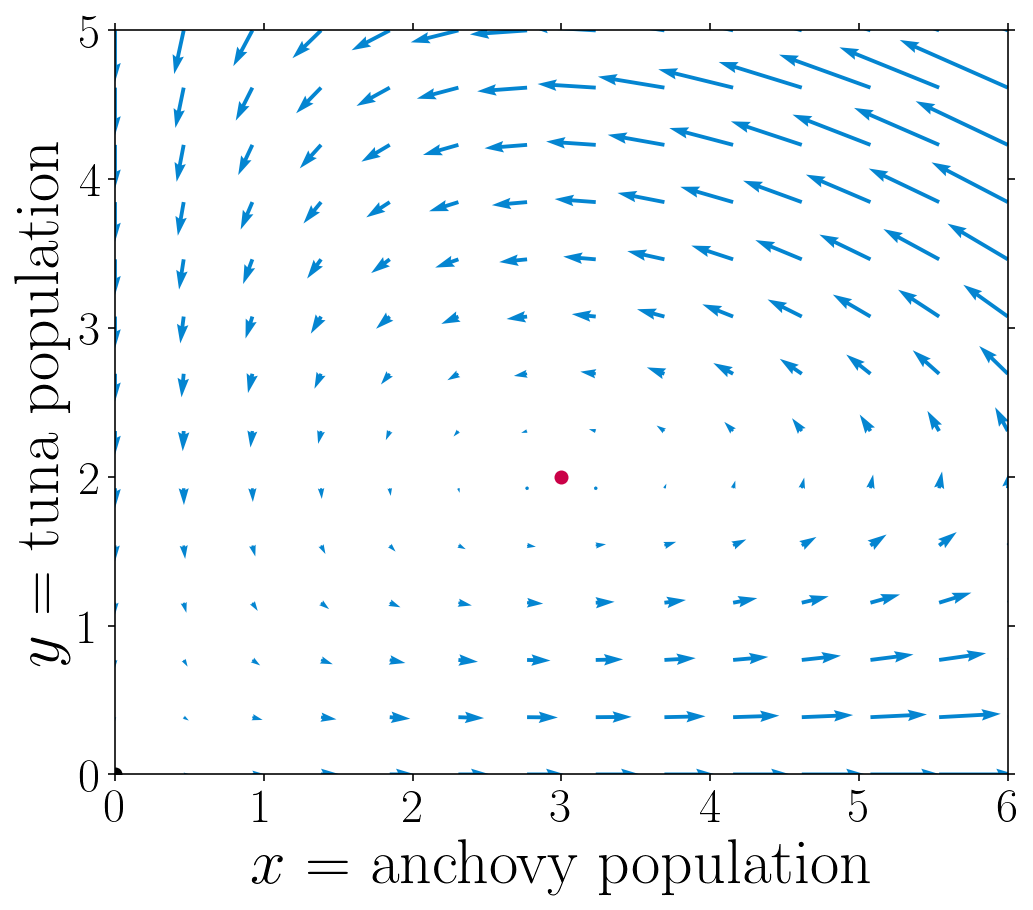

In [15]:
fig, ax = plt.subplots()

# define all plot parameters + ensure axis labels all look nice. 
# Lots of this stuff is purely optional. 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

textcolor = 'k'

plt.xlim([0, xmax])
plt.ylim([0,ymax])

plt.xlabel(r"$x$ = anchovy population", fontsize=32, color = textcolor)
plt.ylabel(r"$y$ = tuna population", fontsize=32, color = textcolor)

plt.tick_params(axis='x', which='both', top='off', color = textcolor)
plt.xticks(fontsize=24, rotation=0, color = textcolor)
plt.tick_params(axis='y', which='both', right='off', color = textcolor)
plt.yticks(fontsize=24, rotation=0, color = textcolor)

# sketch span of each eigenvector
xdata= np.linspace(0,xmax,samples_per_axis)
vplus = -np.sqrt(alpha)*xdata
vminus = np.sqrt(alpha)*xdata

# plot the zero equilibrium
plt.plot(0., 0.,'ko',)

# plot the nonzero equilibrium
plt.plot(x_eq, y_eq,'o', color='xkcd:ruby')

# sketch arrows of ODE's direction field. 
plt.quiver(x,y,u,v, color='xkcd:cerulean', linewidth=4)

# adjust figure aspect ratio and size for maximum clarity
ax.set_aspect(1.)
plt.rcParams['figure.figsize'] = [8, 8]

plt.rcParams["axes.edgecolor"] = 'k'

# finally, show the plot
plt.show()


In the above image, the interesting equilibrium $(x_0, y_0)$ is displayed as a red dot. We notice that, since our system is nonlinear, the direction field is a bit more interesting than ones we have seen for linear systems: near the axes, the arrows mostly point in the same direction, but as we move up and to the right we find that the arrows seem to indicate that the populations want to move through $(x,y)$ space in elliptical patterns. In other words, we expect that both $x(t)$ and $y(t)$ are generically nearly periodic This makes sense intuitively: more anchovies mean more food for the tuna, which means more tuna because they can stay alive longer, which leads to less anchovies, which leads to less tuna due to the initial boom being unsustainable, which leads to more anchovies, .... and so on!  

We can test this quasi-periodicity hypothesis by numerically solving LV. The following block of code simulates LV up to a large time $T$, hopefully enough to see periodicity emerge. I reiterate that you don't need to know how this code works! 

In [8]:
# Prescribe physical parameters
T = 30 # Final time

# Prescribe initial conditions 
x0 = x_eq + 1.

y0 = y_eq - 0.5

# Prescribe time step
h= 0.01 

# Determine number of time steps, making sure to store this as a Python integer. 
N = int(T/h) 

# Initialize solution vectors z, using this storage convention:
# z= [(v(0),w(0))^T | (v(h),w(h))^T | ... | (v(N*h),w(N*h))^T] 

z = np.zeros((2, N+1), dtype=float)

z[:,0] = np.array([x0, y0])

# define RHS of LV system as a Python function. 
# I know it's a cardinal sin to redefine something we've used before, 
# but this avoids us having to write a cleaner but more complex code that can 
# handle the RHS both for the direction plots and the numerical solve. 
# Besides, no-one will probably read this box anyway :P 
def f(z):
    z=np.array(z)
    
    x,y= z
    
    # Initialize f
    f=np.zeros(2, dtype=float)
    
    # Compute f = [ f[0], f[1] ]^T in terms of v and w
    f[0] = A*x - alpha*x*y
    
    f[1] = -B*y - H*y +beta*x*y
    
    return f

# We also must define the nonlinear map whose roots need to be found at each time-step. 
# This could be avoided by using Python's nifty "lambda" tool, but I want to keep the 
# syntax as transparent as possible. 
def F(z, *params):
    z0 = params
    
    F = 2.*h*f(z) - 3.*z + z0

    return np.reshape(F,(2)) # enforce F to have the correct shape
    
# Since we are using a 3-step method, we need to set solution at time h before we can enter 
# the time-stepping loop proper. For stability we use the backward Euler method to do this.  
def F_euler(z, *params):
    z0 = params
    
    F_euler = h*f(z) - z + z0

    return np.reshape(F_euler,(2)) 
    
# Use backward Euler to find solution at time h
params = (z[:,0])
z[:, 1]= fsolve(F_euler, np.zeros((2), dtype=float), args=params) 

# Do time stepping 
for n in np.arange(2,N+1):

    # Set parameters for input into F
    params = (4.*z[:,n-1]-z[:,n-2])

    # Solve nonlinear system via Powell's modification of Newton's method through the 
    # scipy function "fsolve", which (as we have used it here) takes in a function F, 
    #an initial guess at the root of F, and any extra parameters that need to be passed into F. 
    z[:, n] = fsolve(F, np.zeros((2), dtype=float),args=params) 


We now plot the results of the simulation. 

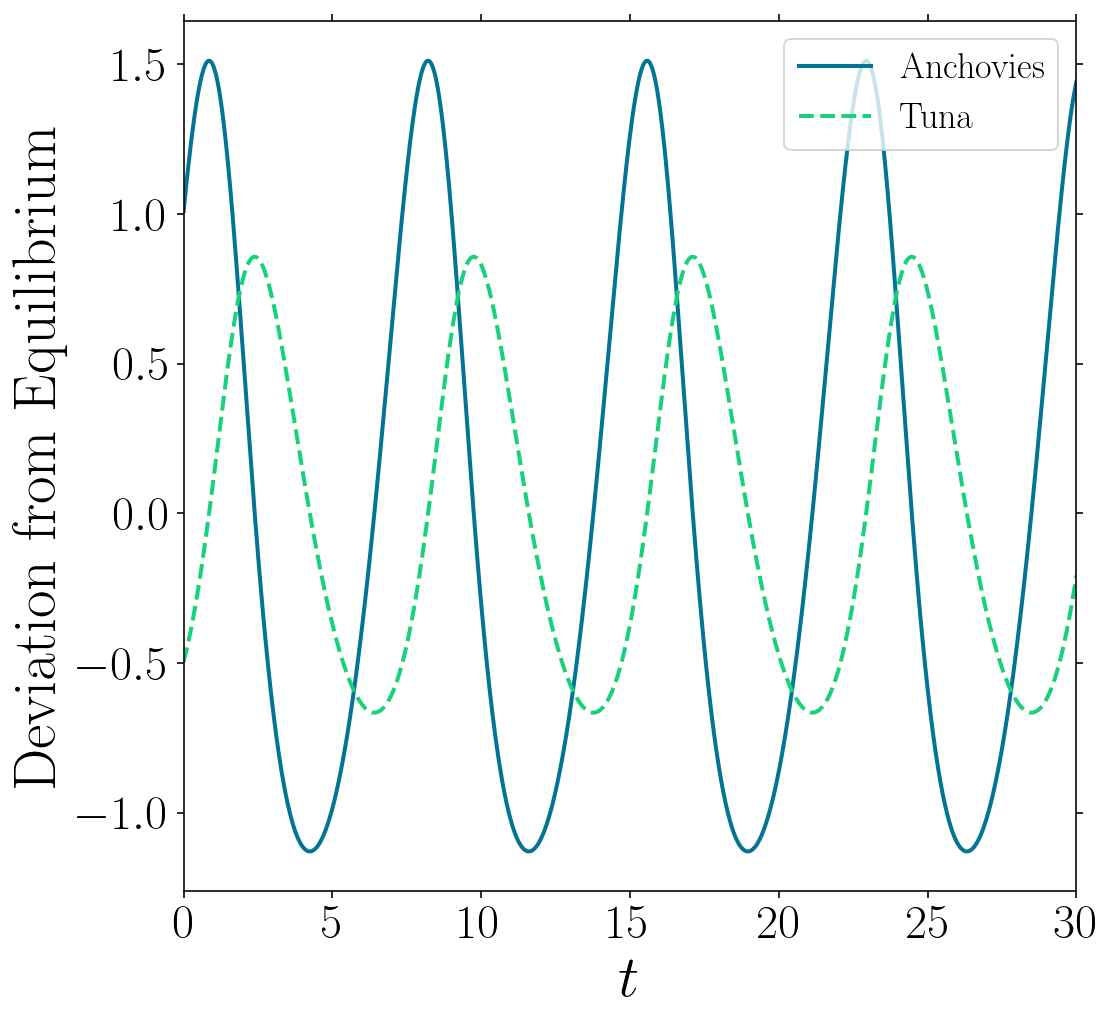

In [9]:
# Plot solution
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

t=np.linspace(0,T,N)

fig=plt.figure()
ax = fig.add_subplot(111, frameon=True)

plt.plot(t, z[0,1:]-x_eq, linewidth=2 , color='xkcd:sea blue')
plt.plot(t, z[1,1:]-y_eq, linewidth=2, color='xkcd:seaweed', linestyle='dashed')

#plt.rcParams['axes.spines.right'] = False
#plt.rcParams['axes.spines.top'] = False

plt.xlim([0,T])
#plt.ylim([0.9*y0, 1.1*x0])

plt.legend(['Anchovies', 'Tuna'], loc='upper right', fontsize=18)

plt.xlabel(r"$t$", fontsize=30, color = textcolor)
plt.ylabel(r"Deviation from Equilibrium", fontsize=30, color = textcolor)

plt.tick_params(axis='x', which='both', top='off', color = textcolor)
plt.xticks(fontsize=24, rotation=0, color = textcolor)
plt.tick_params(axis='y', which='both', right='off', color = textcolor)
plt.yticks(fontsize=24, rotation=0, color = textcolor)

#"""
plt.show()

Near-periodicity is plain to see from this simulation, confirming our earlier guess. Additionally, we find that the rise in tuna population in response to anchovy population is always slightly delayed. In other words, the two population curves are out of phase. 

## Pen-and-Paper Analysis of the Linearized Equations

We would now like to ask whether or not we can analytically confirm some of the results of our numerical experiments above. In particular, can we show with pen and paper that solutions are approximately periodic, at least if the initial state is near $(x_0, y_0)$? To make this analysis tractable, we need to justify the replacement of LV with an easier-to-understand linear system of equations. This is easily accomplished with Taylor's theorem, as you have discussed in class. 

### Case 1: Trivial Equilibrium $(0,0)$

We can use the multivariable version of Taylor's theorem to reduce LV (approximately) to the linearized system
$$ \frac{\mathrm{d}}{\mathrm{d}t}\begin{pmatrix} x \\ y\end{pmatrix} = \begin{pmatrix}A & 0 \\ 0& -(B+H)\end{pmatrix}\begin{pmatrix} x \\ y\end{pmatrix}$$
when $(x,y)^{\mathrm{T}}$ is close to $(0,0)$. 

The general solution of this simplifed linear equation is 
$$  \begin{pmatrix} x \\ y\end{pmatrix} = \begin{pmatrix} C_{1}e^{At} \\ C_{2}e^{-(B+H)t}\end{pmatrix}.$$
So, $(0,0)$ is a saddle-point equilibrium for this system; in particular, it is unstable. We then say that $(0,0)$ is a linearly unstable equilibrium of the full LV model. 

Now, we plot the direction field for the linearized system near the trivial equilibrium $(0,0)$.

In [10]:
xmax_0 = 6 
ymax_0 = 6
samples_per_axis = 14 # number of sample points per axis

# create mesh grid of data points where we sample direction field/RHS of ODE
x_0,y_0 = np.meshgrid(np.linspace(-xmax_0,xmax_0,samples_per_axis),np.linspace(-xmax_0,ymax_0,samples_per_axis))

In [11]:
# define direction field sampled at mesh grid of data points
u_lin0 = A*x_0
v_lin0 = -(B+H)*y_0

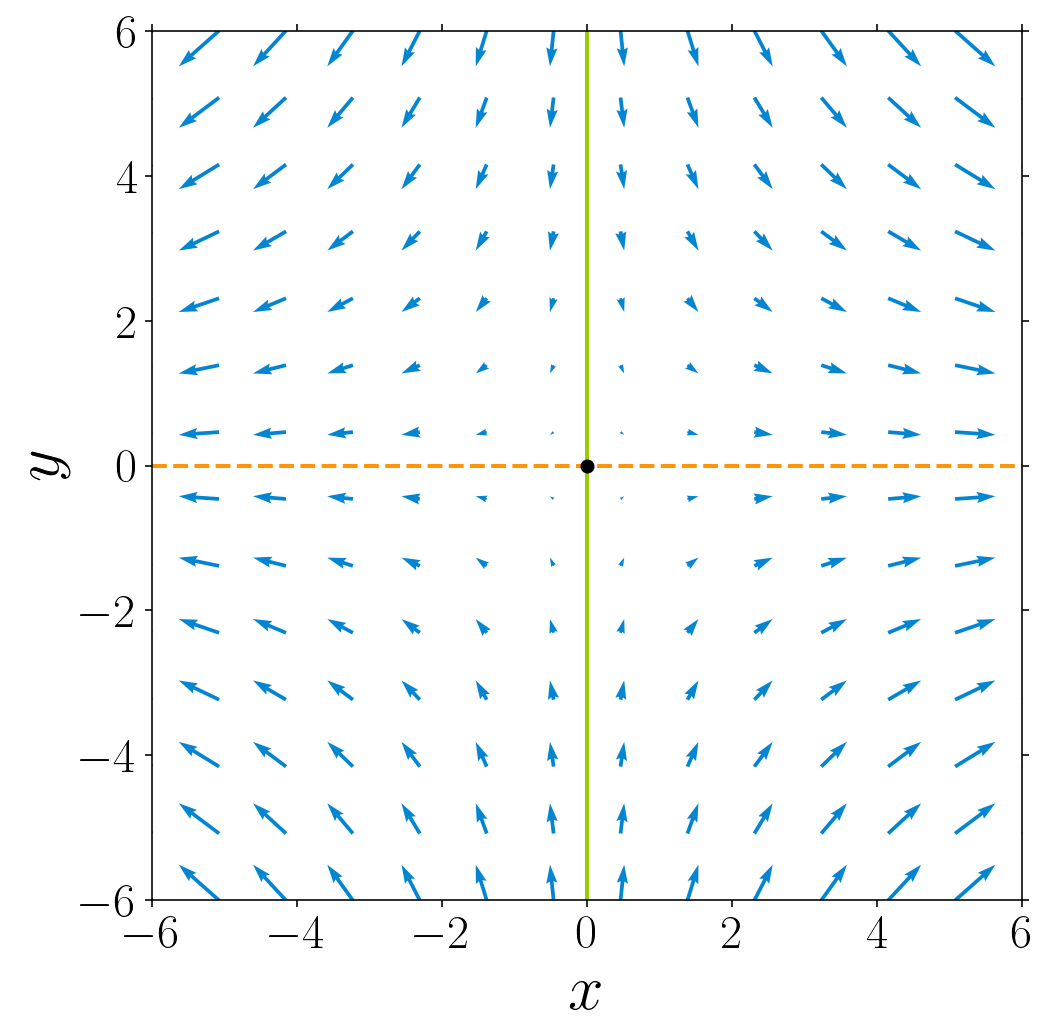

In [12]:
fig, ax = plt.subplots()

# define all plot parameters + ensure axis labels all look nice. 
# Lots of this stuff is purely optional. 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.xlim([-xmax_0, xmax_0])
plt.ylim([-ymax_0,ymax_0])

plt.xlabel(r"$x$", fontsize=32, color = textcolor) #todo: change these labels!
plt.ylabel(r"$y$", fontsize=32, color = textcolor)

plt.tick_params(axis='x', which='both', top='off', color = textcolor)
plt.xticks(fontsize=24, rotation=0, color = textcolor)
plt.tick_params(axis='y', which='both', right='off', color = textcolor)
plt.yticks(fontsize=24, rotation=0, color = textcolor)

# sketch span of each eigenvector
xdata= np.linspace(-xmax_0,xmax_0,samples_per_axis)
ydata= np.linspace(-ymax_0,ymax_0,samples_per_axis)

plt.plot(xdata, np.zeros_like(xdata), color='xkcd:tangerine', linewidth='2', linestyle='dashed')
plt.plot(np.zeros_like(ydata), ydata, color='xkcd:slime green', linewidth='2', linestyle='solid')

# plot the zero equilibrium
plt.plot(0., 0.,'ko',)

plt.quiver(x_0,y_0,u_lin0,v_lin0, color='xkcd:cerulean', linewidth=3)

# adjust figure aspect ratio and size for maximum clarity

ax.set_aspect(1)
plt.rcParams['figure.figsize'] = [8, 8]

# finally, show the plot
plt.show()

The solid green line denotes the $-(B+H)$-eigenspace, which is precisely the $y$-axis, and the orange dashed line denotes the (dominant) $A$-eigenspace, which is precisely the $x$-axis. From this picture we readily confirm that $(0,0)$ is a saddle point equilibrium for the linearized LV system about $(0,0)$. 

### Case 2: The Nontrivial Equilibrium $\left(x_0, y_0\right)$

We can play the same game with the more interesting equilibrium $(x_0, y_0)$. If we define $p=x-x_0$ and $q=y-y_0$ then the linearized system is 
$$ \frac{\mathrm{d}}{\mathrm{d}t}\begin{pmatrix} p \\ q\end{pmatrix} = \begin{pmatrix} 0 & -\frac{\alpha(B+H)}{\beta} \\ \frac{\beta A}{\alpha} & 0 \end{pmatrix}\begin{pmatrix} p \\ q\end{pmatrix}.$$ By Taylor's theorem, this should be a good approximation to LV when $(x,y)^{\mathrm{T}}$ is close to $(x_0,y_0)$.

This linear system has eigenvalues $$ \lambda =\pm i\sqrt{A(B+H)}. $$ These are purely imaginary, so the origin is a stable equilibrium. It is not an asymptotically stable, equilibrium, though! Additionally, we know that $(p,q)$ follow elliptical paths around the origin, unless we start at the origin, in which case we stay there indefinitely. This means that the linearized dynamics near $(x_0, y_0$ are actually periodic, which in turn confirms our earlier intuitive guess that the tuna and anchovy populations approximately oscillate over time. 

In [13]:
# define direction field sampled at mesh grid of data points
u_lin1 = -(alpha/beta)*(B+H)*y_0
v_lin1 = (A*beta/alpha)*x_0

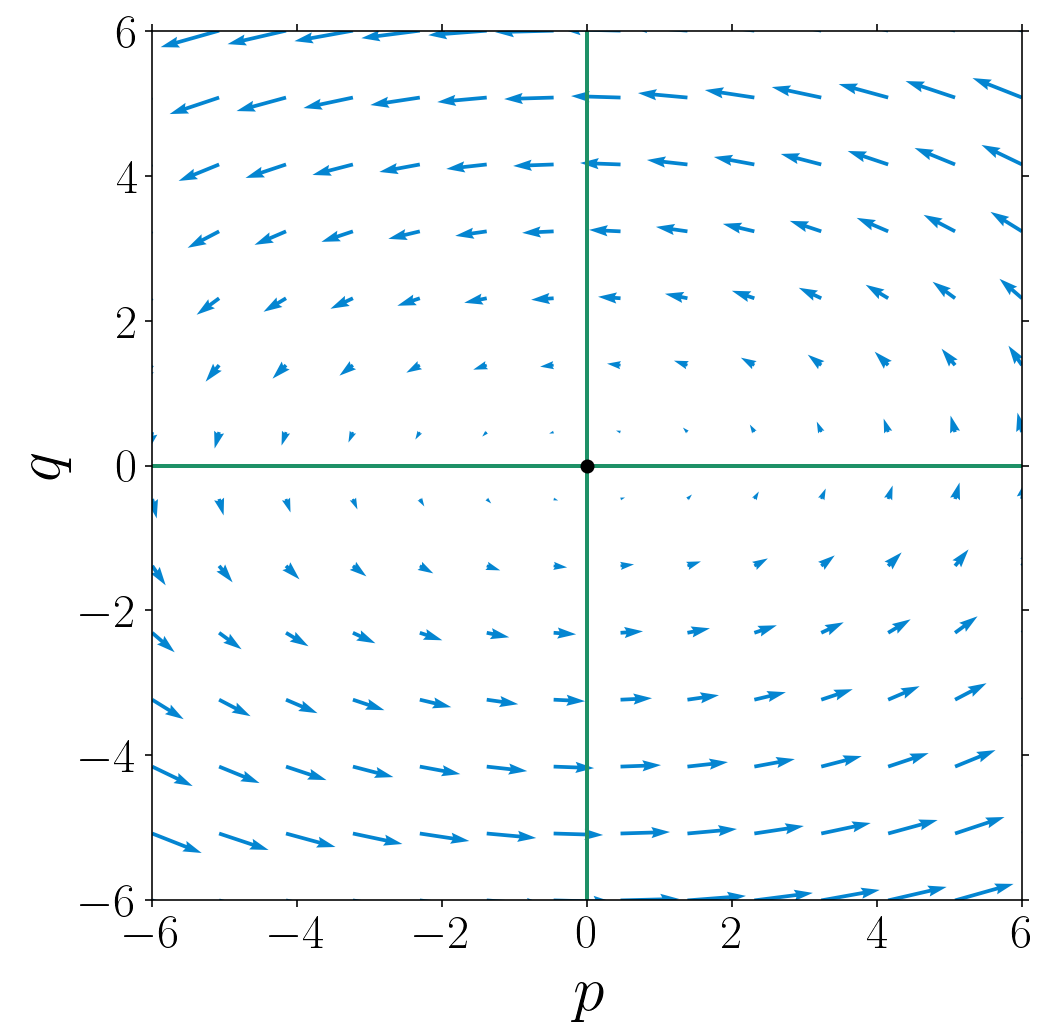

In [14]:
fig, ax = plt.subplots()

# define all plot parameters + ensure axis labels all look nice. 
# Lots of this stuff is purely optional. 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.xlim([-xmax_0, xmax_0])
plt.ylim([-ymax_0,ymax_0])

plt.xlabel(r"$p$", fontsize=32, color = textcolor) #todo: change these labels!
plt.ylabel(r"$q$", fontsize=32, color = textcolor)

plt.tick_params(axis='x', which='both', top='off', color = textcolor)
plt.xticks(fontsize=24, rotation=0, color = textcolor)
plt.tick_params(axis='y', which='both', right='off', color = textcolor)
plt.yticks(fontsize=24, rotation=0, color = textcolor)

# sketch span of each eigenvector
xdata= np.linspace(-xmax_0,xmax_0,samples_per_axis)
ydata= np.linspace(-ymax_0,ymax_0,samples_per_axis)

plt.plot(xdata, np.zeros_like(xdata), color='xkcd:viridian', linewidth='2', linestyle='solid')
plt.plot(np.zeros_like(ydata), ydata, color='xkcd:viridian', linewidth='2', linestyle='solid')

# plot the zero equilibrium
plt.plot(0., 0.,'ko',)

plt.quiver(x_0,y_0,u_lin1,v_lin1, color='xkcd:cerulean', linewidth=3)

# adjust figure aspect ratio and size for maximum clarity

ax.set_aspect(1)
plt.rcParams['figure.figsize'] = [8, 8]

# finally, show the plot
plt.show()

The green lines denote the $xy$ axes: since we have imaginary eigenvalues, there are no eigenaxes as in the previous case. Again, the stability of $(x_1, y_1)$ is clear from this image. I reiterate that this is not asymptotic stability, nor should it be on physical grounds. 

Also, I remark that the real general solution of the linearized system near $(x_0, y_0)$ is 
$$
\begin{pmatrix} x(t) \\ y(t) \end{pmatrix} = \begin{pmatrix} x_0 \\ y_0 \end{pmatrix} +  K \begin{pmatrix} x_0\cos\left(\omega t +\Delta \right) \\ y_0\sqrt{\frac{B+H}{A}}\sin\left(\omega t +\Delta \right) \end{pmatrix} 
$$
where $K, \Delta$ are integration constants and $\omega = \sqrt{A(B+H)}$. Using the trig identity
$$
\sin(z) = \cos\left(z+\frac{\pi}{2}\right),
$$
we find that the linearized tuna population always lags a quarter-period behind the linearized anchovy population. This is a partial substantiation of our numerical simulation from earlier! 

Finally, I leave you with the proviso that LV is far too simple to be a completely accurate model of the tuna population in the Mediterranean. For instance, it ignores other prey species like herring that tuna love to eat, and it also ignores other apex predators like sharks that tuna compete with for resources. High-quality population modelling requires more complicated differential equations, and masterful use of real-life statistics. 